# Trabajo práctico integrador

**Nombre**: Edgar David Guarin Castro

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(suppress=True, precision=4)

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{i=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{i=1 \wedge x_i != 0}^n{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [2]:
#------------------
# Se define la función que calculará la norma:
#------------------

def norm_p(arr,p):
    """
    (np.array, float|str) -> (np.array)
    
    p = int, float o 'inf'

    Recibe un np.array de entrada y el índice de la norma p.
    Regresa el resultado de la norma aplicada a cada fila en otro np.array de salida.
    El arreglo de salida contiene los índices de las filas del arreglo inicial (primera columna)
    y sus correspondientes normas (segunda columna).

    Cada fila del arreglo de entrada es considerada como un vector.
    """

    assert type(p) in [int,float] or (type(p) == str and p.lower() == 'inf'), "p debe ser un número o 'inf'"

    #------------------
    # Lista para generar el arreglo de salida con la forma [row_idx, norm_value]:
    #------------------
    norm = []

    #------------------
    # Si el arreglo es 1D se convierte en uno 2D:
    #------------------
    if arr.ndim == 1:
        arr = arr.reshape(1, -1)

    print(f"Matriz de entrada \n")
    print(arr)
    print(f"\nNorma evaluada para p = {p} \n")

    #------------------
    # Se itera sobre cada fila del arreglo de entrada
    #------------------
    for row_idx in range(arr.shape[0]):
        #------------------
        # Se definen las normas según el valor de p
        #------------------

        # Norma para p=0
        if p == 0:
            # Se crea un arreglo que guarda una variable booleana para cada elemento de la fila
            # si x_i != 0 es True sino es False
            non_zero = arr[row_idx] != 0
            # Se escogen los elementos de la fila diferentes de cero (non_zero==True)
            # se guardan en un arreglo: arr[row_idx][non_zero]
            # y luego se calcula el valor absoluto de cada elemento y la suma de ellos
            norm_value = np.sum(np.abs(arr[row_idx][non_zero]))

        # Norma para p != 0,infinito
        elif (type(p) in [int, float]):
            # Se calcula el valor absoluto de cada elemento
            # luego se eleva a la potencia p
            # se suman los valores resultantes
            # y se eleva el resultado de la suma a la potencia 1/p
            norm_value = np.sum(np.abs(arr[row_idx])**p)**(1/p)
            
        # Norma para p=infinito
        elif p.lower() == 'inf':
            # Se obtiene el valor absoluto del mayor elemento de cada fila
            norm_value = np.max(np.abs(arr[row_idx]))


        # el resultado de cada fila es una fila del arreglo de salida
        norm.append([row_idx,norm_value])

        print(f"Fila {row_idx}, norma l_{p} = {norm_value}")
    
    return np.array(norm)

In [3]:
#------------------
# Se define la matriz de entrada y el índice p:
#------------------
A  = np.array([[4,0,-2] , [3,-6,1] , [0,2,5]])
p = 0

#------------------
# Se calcula la norma deseada:
#------------------
norm_p(A,p)

Matriz de entrada 

[[ 4  0 -2]
 [ 3 -6  1]
 [ 0  2  5]]

Norma evaluada para p = 0 

Fila 0, norma l_0 = 6
Fila 1, norma l_0 = 10
Fila 2, norma l_0 = 7


array([[ 0,  6],
       [ 1, 10],
       [ 2,  7]])

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [4]:
truth =      np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

#------------------
# Se calculan los verdaderos positivos (TP)
#------------------
TP = np.sum((truth == 1) & (prediction == 1))
print(f"Verdaderos Positivos: {TP}")

#------------------
# Se calculan los verdaderos negativos (TN)
#------------------
TN = np.sum((truth == 0) & (prediction == 0))
print(f"Verdaderos Negativos: {TN}")

#------------------
# Se calculan los falsos positivos (FP)
#------------------
FP = np.sum((truth == 0) & (prediction == 1))
print(f"Falsos Positivos: {FP}")

#------------------
# Se calculan los falsos negativos (FN)
#------------------
FN = np.sum((truth == 1) & (prediction == 0))
print(f"Falsos Negativos: {FN}")

#------------------
# Se calcula la precisión
#------------------
precision = TP / (TP + FP)
print(f"Precision: {precision}")

#------------------
# Se calcula el recall
#------------------
recall = TP / (TP + FN)
print(f"Recall: {recall}")

#------------------
# Se calcula la exactitud
#------------------
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy}")

Verdaderos Positivos: 3
Verdaderos Negativos: 1
Falsos Positivos: 3
Falsos Negativos: 3
Precision: 0.5
Recall: 0.5
Accuracy: 0.4


### Tercer ejercicio

Crear una función que separe los datos en train-validation-test. Debe recibir de parametros:

- X: Array o Dataframe que contiene los datos de entrada del sistema.
- y: Array o Dataframe que contiene la(s) variable(s) target del problema.
- train_percentage: _float_ el porcentaje de training.
- test_percentage: _float_ el porcentaje de testing.
- val_percentage: _float_ el porcentaje de validación.
- shuffle: _bool_ determina si el split debe hacerse de manera random o no.

Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [5]:
def split(X_input,
          Y_input,
          train_percentage = 0.7,
          test_percentage  = 0.15,
          val_percentage   = 0.15,
          random_state = 42,
          shuffle = True):
      """
      (np.array, np.array, float, float, float, float, bool) -> (np.array, np.array, np.array, np.array, np.array, np.array)

      Recibe un conjunto de datos X e Y, los porcentajes de training, test y validation, una semilla aleatoria y un booleano
      para determinar si la separación debe hacer de forma aleatoria o no.

      Al final se obtienen los arreglos de train, test y validation para X e Y
      """

      #------------------
      # Se verifica si las proporciones de train, test y validation suman 1
      #------------------
      assert train_percentage + test_percentage + val_percentage == 1, "Las proporciones de train, test y validation deben sumar 1"

      #------------------
      # Se comprueba si los arreglos X_input y Y_input tienen la misma longitud
      #------------------
      assert len(X_input) == len(Y_input), "X_input y Y_input deben tener la misma longitud"

      #------------------
      # Se verifica si los datos de entrada son columnas de un dataframe, en cuyo caso son convertidos a np.arrays
      #------------------
      if type(X_input) == pd.Series:
            X_input = X_input.to_numpy()

      if type(Y_input) == pd.Series:
            Y_input = Y_input.to_numpy()

      #------------------
      # Se crea un arreglo de índices para facilitar la separación y posible mezcla
      #------------------
      idx = np.arange(len(X_input))

      #------------------
      # Si shuffle es True, la separación se hace aleatoriamente
      #------------------
      if shuffle:
            # Se establece la semilla que permitirá reproducir la división
            np.random.seed(random_state)
            # Los índices se mezclan aleatoriamente
            np.random.shuffle(idx)

      #------------------
      # Se obtienen los tamaños de los conjuntos de train y test usando X como referencia
      # Estos tamaños son básicamente el número de índices o entradas de X que 
      # deben ser usados para train y test y que dependen de los porcentajes dados
      #------------------
      train_size = int(len(X_input) * train_percentage)
      test_size = train_size + int(len(X_input) * test_percentage)

      #------------------
      # Finalmente se realiza la división train, test y validation para X e Y
      # usando el arreglo de índices creado anteriormente
      #------------------
      X_train = X_input[idx[:train_size]]
      Y_train = Y_input[idx[:train_size]]

      X_test = X_input[idx[train_size:test_size]]
      Y_test = Y_input[idx[train_size:test_size]]

      X_val = X_input[idx[test_size:]]
      Y_val = Y_input[idx[test_size:]]

      return X_train, Y_train, X_test, Y_test, X_val, Y_val

In [6]:
#------------------
# Se producen dos arreglos X e Y aleatorios para probar la función
#------------------
X = np.random.rand(10)
Y = np.random.rand(10)

X_train, Y_train, X_test, Y_test, X_val, Y_val = split(X,Y) # Train = 70%, Test = 15%, Validation = 15%

print("Datos de entrenamiento:")
print(f"X_train: {X_train}")
print(f"Y_train: {Y_train}")

print("\nDatos de prueba:")
print(f"X_test: {X_test}")
print(f"Y_test: {Y_test}")

print("\nDatos de validación:")
print(f"X_val: {X_val}")
print(f"Y_val: {Y_val}")

Datos de entrenamiento:
X_train: [0.2199 0.9249 0.3322 0.8664 0.1386 0.4696 0.8428]
Y_train: [0.0326 0.0467 0.6418 0.4931 0.7507 0.3726 0.1095]

Datos de prueba:
X_test: [0.465]
Y_test: [0.9959]

Datos de validación:
X_val: [0.4608 0.8118]
Y_val: [0.9638 0.9291]


## Segunda parte (Aprendizaje Supervisado)

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [7]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers
import matplotlib.pyplot as plt

### Cuarto ejercicio

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Analice como varía el problema cuando se generan múltiples veces el dataset con un valor de _noise_ fijo. 

- Qué pasa con los coeficientes de las variables no informativas?
- La regresión se ve afectada por estas variables?
- Simule el mismo dataset 100 veces y analice los coeficientes, que se puede notar?

In [8]:
#------------------
# Se producen los datos con la función generate_dataset
#------------------
n_samples=1000
n_features=10
data = generate_dataset(n_samples=n_samples,
                    n_features=n_features,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,11.851066
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,-51.991638
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,-26.812546
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,9.860582
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,-12.097448
...,...,...,...,...,...,...,...,...,...,...,...
995,0.332314,0.067518,0.115675,0.711615,-1.534114,1.179297,-1.124642,-0.748487,1.551152,1.277677,51.631472
996,-0.214150,-0.837090,-1.585626,-1.114081,-0.942060,1.140068,-0.630931,0.837154,-0.321159,-0.547996,-71.831895
997,1.368079,-0.592241,1.223856,-0.812546,0.034888,0.337956,2.105297,0.125901,0.851124,-1.375511,69.265382
998,1.223083,0.270057,-0.570351,-0.824514,-0.528978,-1.820603,-0.608590,-0.258854,0.352505,-1.056558,3.311900


In [9]:
#------------------
# La función describe() de pandas permite obtener datos relevantes de cada set de datos
# como por ejemplo los valores mínimo y máximo para determinar el rango de X
#------------------
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.013622,0.038105,0.005495,0.010788,-0.022542,-0.023104,0.031292,-0.029252,-0.002689,-0.043075,0.370219
std,1.012645,0.945284,1.030962,1.005433,0.983366,0.986846,1.016046,1.037024,1.031230,0.983406,72.291014
min,-3.138515,-3.176704,-3.601085,-3.922400,-3.241267,-3.007632,-3.688365,-3.170426,-2.801912,-2.943142,-306.831412
25%,-0.651541,-0.559290,-0.713176,-0.616527,-0.702626,-0.650034,-0.631506,-0.749592,-0.744779,-0.750008,-51.228433
50%,-0.012020,0.019097,-0.013284,0.014006,-0.015036,-0.003221,0.007605,-0.012086,-0.024976,-0.001346,3.704217
75%,0.721896,0.687027,0.696602,0.679698,0.613766,0.608861,0.685621,0.680087,0.683319,0.638310,50.194414
max,2.935658,3.852731,3.137749,3.076860,3.152057,3.377383,3.529055,3.926238,3.243093,3.117681,264.275060


In [10]:
#------------------
# La función corr() de pandas, tomando sólo la última columna generada,
# muestra el valor de correlación entre los sets de datos X y el target.
# Se observa por ejemplo que x0 posee la mayor correlación.
# Los sets x3, x4, x6 y x9 también tienen una correlación del orden de 10^-1
# Esto indica que los demás sets corresponden a variables no informativas
#------------------
data.corr().target

x0        0.816945
x1       -0.015045
x2        0.003828
x3        0.447518
x4        0.108540
x5        0.035192
x6        0.158042
x7       -0.023203
x8       -0.028230
x9        0.120210
target    1.000000
Name: target, dtype: float64

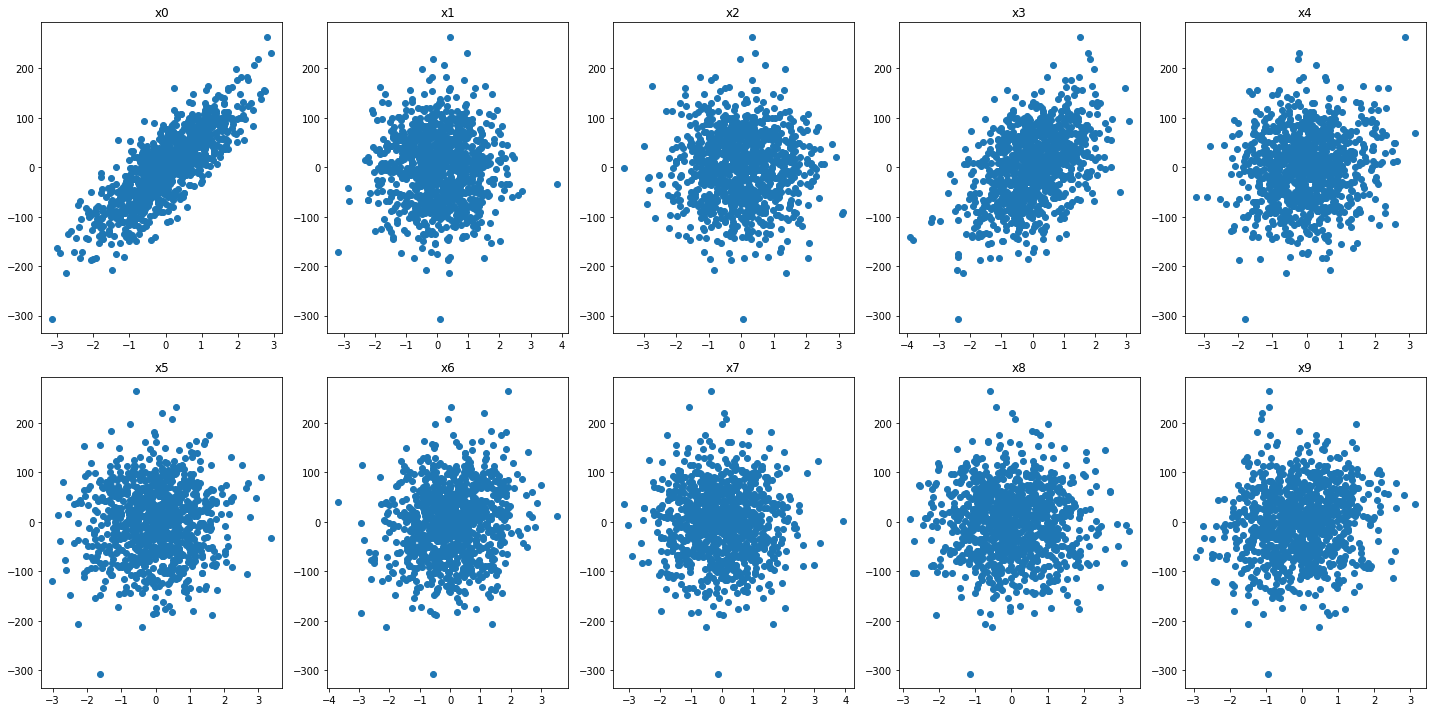

In [11]:
#------------------
# Los datos de target se grafican en función de los sets X
# Así, se puede apreciar mejor la correlación entre ellos
#------------------

# filas y columnas de la matriz de gráficos
rows = 2
cols = 5
f ,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))

# Se crea un DataFrame que contiene únicamente los sets X
datax = data.drop(columns=data.columns[-1])

for r, c in enumerate(datax.columns):
    # fila de la matriz de gráficos
    row = r // cols

    # columna de la matriz de gráficos
    col = r % cols

    ax[row, col].scatter(data[c],data["target"])
    ax[row, col].set_title(c)

plt.tight_layout()
plt.show()

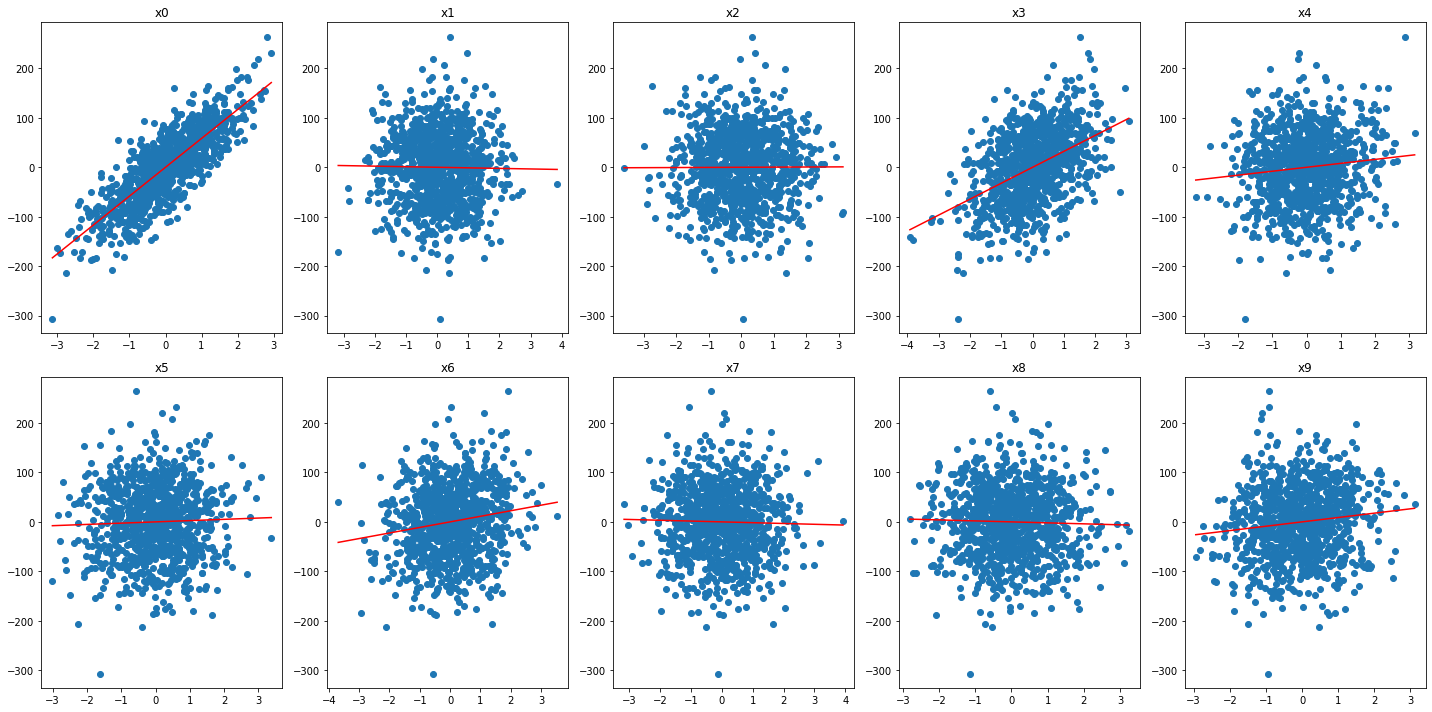

,set x,beta,Errores residuales,Errores cuadráticos medios,Desviación cuadrática media,R2,Estadístico F
0,x0,58.314673,1.320446,1736.610860,41.672663,0.667365,2002.102026
1,x3,32.177000,2.047423,4175.188643,64.615700,0.200273,249.929300
2,x6,11.245115,2.260705,5090.365236,71.346796,0.024977,25.568344
3,x9,8.803327,2.273000,5145.884980,71.734824,0.014343,14.629894
4,x4,7.966341,2.276019,5159.562054,71.830092,0.011723,11.917002
5,x5,2.567745,2.288101,5214.483654,72.211382,0.001203,1.263000
6,x8,-1.979893,2.288595,5216.737254,72.226984,0.000771,0.822167
7,x7,-1.626267,2.288885,5218.058132,72.236128,0.000518,0.563346
8,x1,-1.132935,2.289257,5219.754117,72.247866,0.000194,0.251743
9,x2,0.270310,2.289491,5220.824171,72.255271,-0.000011,0.040821


In [12]:
#------------------
# Se realiza una regresión lineal con ordenada nula: y = beta * x
# y los resultados se grafican nuevamente
#------------------
f ,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))

# número de puntos para el gráfico de la regresión lineal
npoints = 250

# listas para guardar las etiquetas de cada set, los betas de la regresión lineal y los coeficientes de determinación de bondad
sets,betas,mses,rmses,rses,r2s,fs = [],[],[],[],[],[],[]

# La columna target se transforma en un arreglo Y
y = data.target.to_numpy().reshape((len(data),1))

# Se itera sobre el dataframe que contiene solo los sets X
for r, c in enumerate(datax.columns):
    # Las columnas que contienen datos de X se transforman en arreglos
    x = data[c].to_numpy().reshape((len(data),1))
    
    # para cada columna de datos se calcula el parámetro beta de la regresión lineal
    b = np.dot(np.dot(x.T,x)**(-1), np.dot(x.T,y))
    
    # rango de valores para x en la regresión lineal
    xspace = np.linspace(x.min(),x.max(),npoints)
    
    # función lineal estimada
    y_hat =  (xspace * b).reshape((npoints,1))

    # Suma de los cuadrados de los residuos
    RSS = np.sum(np.square(y - x*b.item()))

    # Tasa de variabilidad total
    TSS = np.sum(np.square(y - np.mean(y)))

    # Tasa de variabilidad explicada
    ESS = np.sum(np.square(x*b.item() - np.mean(y)))

    #------------------
    # Se calculan los coeficientes de bondad
    #------------------

    # Error cuadrático medio
    MSE = RSS / len(data)

    # Desviación del error cuadrático medio
    RMSE = np.sqrt(MSE)

    # Error residual
    RSE = np.sqrt(RSS)/(len(data)-2)

    # Coeficiente de determinación R²
    R2  = 1 - RSS/TSS

    #Variación residual
    sr = RSS / (len(data)-2)

    #------------------
    # Estadístico F = (ESS/p) / (RSS/(N-p-1))
    # donde p=1 es el número de parámetros de la regresión, que para cada x es un beta
    # N=1000 es el número total de observaciones
    #------------------
    F = ESS / sr

    # fila de la matriz de gráficos
    row = r // cols

    # columna de la matriz de gráficos
    col = r % cols

    ax[row, col].scatter(data[c],data["target"])
    ax[row, col].plot(xspace,y_hat, color='red')
    ax[row, col].set_title(c)

    # los coeficientes obtenidos se guardan en listas
    sets.append(f"x{r}")
    betas.append(b.item())
    mses.append(MSE)
    rmses.append(RMSE)
    rses.append(RSE)
    r2s.append(R2)
    fs.append(F)

plt.tight_layout()
plt.show()

# las listas de coeficientes se transforman en un DataFrame
df = pd.DataFrame(sets, columns=['set x'])
df["beta"] = betas
df["Errores residuales"] = rses
df["Errores cuadráticos medios"] = mses
df["Desviación cuadrática media"] = rmses
df["R2"] = r2s
df["Estadístico F"] = fs

# El dataframe se organiza de forma descendente usando el estadístco F
# así las variables se organizan de mayor a menor información
df = df.sort_values("Estadístico F", ascending=False)
df.reset_index(drop=True)

El DataFrame anterior muestra los valores de $\beta$ de la regresión lineal para cada conjunto de datos $x$, así como sus errores ascoiados, el coeficiente de determinación $R²$ y el estadístico F. El DataFrame ha sido organizado de forma descendente en relación a los valores de F con el fin de dejar las variables informativas en las primeras filas.

Se observa entonces que el conjunto con menores errores y con el mayor $R²$ ($\sim 67\%$) es el conjunto x0. Además, x0 posee el mayor estadístico F. Teniendo en cuenta que el número de parámetros o grados de libertad (df1) de la regresión es 1 (df1 = 1) y que los grados de libertad del error (df2=N-p-1) son df2=998, entonces dentro de un nivel de significancia del 5% el valor crítico de F es $\sim3.84$ y por lo tanto, al ser F>F_crítico para x0 entonces se concluye que x0 es una variable estadisticamente relevante. Así, x0 es la variable que más información aporta sobre el conjunto de datos *target*, ya que la relación entre ellos es altamente lineal con $\beta = 58.31$.

Las variables x3, x6, x9 y x4 también son estadísticamente relevantes pues sus estadísticos F también son mayores al valor crítico mencionado anteriormente. En este sentido, ellas también son variables informativas. Se observa además que cuanto menor el estadítico F, menores son $R^2$, los errores asociados y los beta, indicando una pérdida de correlación entre los datos $x$ y el *target*.

Por su parte, las variablles x5,x8,x7,x1 y x2 son variables no informativas pues poseen errores mayores, coeficientes de determinación menores al $0.1\%$ y son estadísticamente irrelevantes pues sus estadísticos F son menores al estadístico F crítico. Por este motivo, las variaciones en *target* no pueden ser explicadas con estas variables. Además, los valores de $\beta$ para estas variables tienden a cero, en comparación con los valores de $\beta$ obtenidos para las variables informativas.

A continuación se simulan 100 datasets para 100 valores de random_sate diferentes:

In [13]:
#------------------
# Se define una función para hacer la regresión lineal de cada set x
#------------------

def lin_reg(data):
    """
    (df) -> df

    Recibe un dataframe con N variables informativas, M variables no informativas y un target.
    Realiza una regresión lineal simple en cada conjunto de datos x.
    Regresa un dataframe con los valores de beta, los errores de la regresión, el coeficiente R² y el estadístico F para cada set de x
    """
    
    # listas para guardar las etiquetas de cada set, los betas de la regresión lineal y los coeficientes de determinación de bondad
    sets,betas,mses,rmses,rses,r2s,fs = [],[],[],[],[],[],[]

    # Se crea un DataFrame que contiene únicamente los sets X
    datax = data.drop(columns=data.columns[-1])

    # La columna target se transforma en un arreglo Y
    y = data.target.to_numpy().reshape((len(data),1))

    # Se itera sobre el dataframe que contiene solo los sets X
    for r, c in enumerate(datax.columns):
        # Las columnas que contienen datos de X se transforman en arreglos
        x = data[c].to_numpy().reshape((len(data),1))
        
        # para cada columna de datos se calcula el parámetro beta de la regresión lineal
        b = np.dot(np.dot(x.T,x)**(-1), np.dot(x.T,y))

        # Suma de los cuadrados de los residuos
        RSS = np.sum(np.square(y - x*b.item()))

        # Tasa de variabilidad total
        TSS = np.sum(np.square(y - np.mean(y)))

        # Tasa de variabilidad explicada
        ESS = np.sum(np.square(x*b.item() - np.mean(y)))

        #------------------
        # Se calculan los coeficientes de bondad
        #------------------

        # Error cuadrático medio
        MSE = RSS / len(data)

        # Desviación del error cuadrático medio
        RMSE = np.sqrt(MSE)

        # Error residual
        RSE = np.sqrt(RSS)/(len(data)-2)

        # Coeficiente de determinación R²
        R2  = 1 - RSS/TSS

        #Variación residual
        sr = RSS / (len(data)-2)

        #------------------
        # Estadístico F = (ESS/p) / (RSS/(N-p-1))
        # donde p=1 es el número de parámetros de la regresión, que para cada x es un beta
        # N=1000 es el número total de observaciones
        #------------------
        F = ESS / sr

        # los coeficientes obtenidos se guardan en listas
        sets.append(f"x{r}")
        betas.append(b.item())
        mses.append(MSE)
        rmses.append(RMSE)
        rses.append(RSE)
        r2s.append(R2)
        fs.append(F)

    # las listas de coeficientes se transforman en un DataFrame
    df = pd.DataFrame(sets, columns=['set x'])
    df["beta"] = betas
    df["Errores residuales"] = rses
    df["Errores cuadráticos medios"] = mses
    df["Desviación cuadrática media"] = rmses
    df["R2"] = r2s
    df["Estadístico F"] = fs

    # El dataframe se organiza de forma descendente usando el estadístico F
    # así las variables se organizan de mayor a menor información
    df = df.sort_values("Estadístico F", ascending=False)
    df  = df.reset_index(drop=True)

    return df

Ahora se calculan las métricas de la regresión lineal para 100 conjuntos de datos diferentes generados con 100 *random seeds* distintas. Al final se seleccionan los parámetros $\beta$, así como las métricas de los datos $x$ que son estadísticamente más relevantes, para de esta forma observar su comportamiento en función del valor de *random_state*

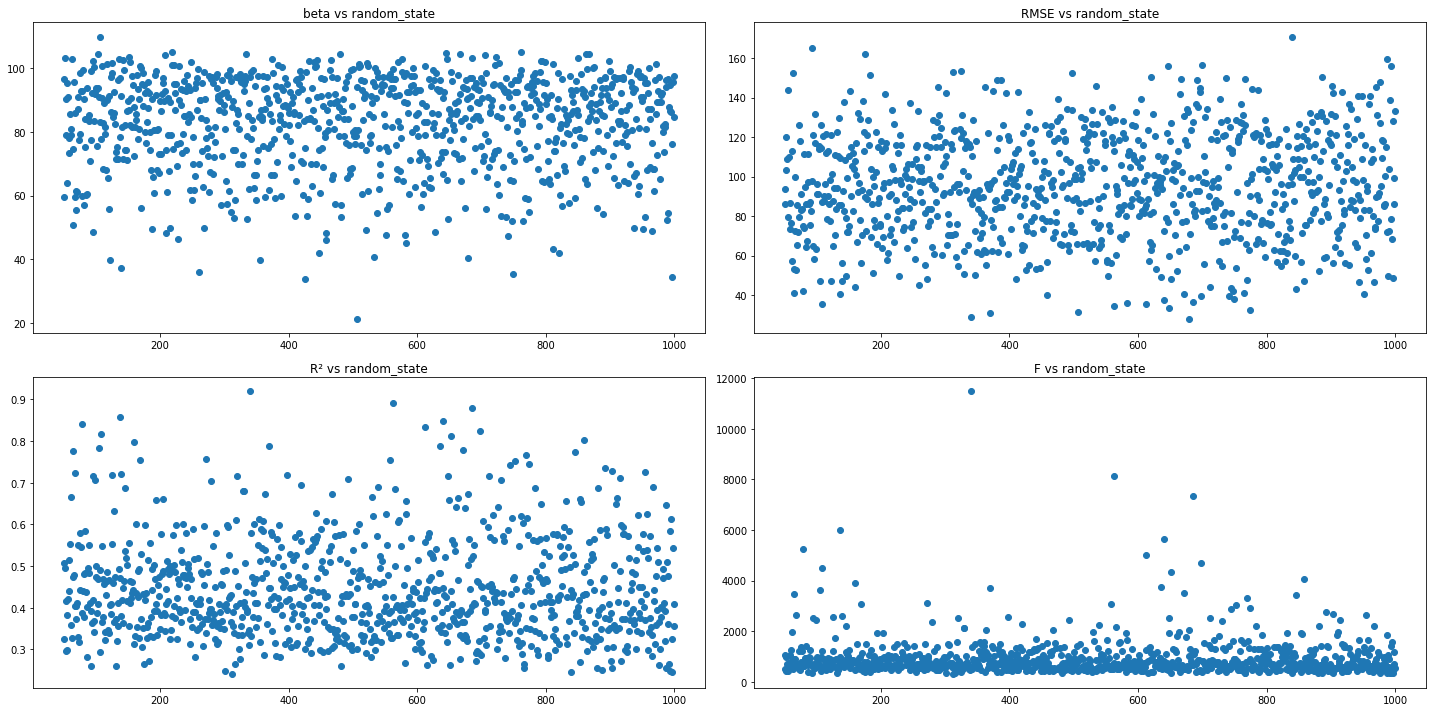

Beta promedio : 82.88464344868713
RMSE promedio : 95.06427708480588
R^2 promedio : 0.44500486032533576
F promedio : 944.6948137859526
F mínimo : 318.0387952970773


In [14]:
#------------------
# Parámetros para la función generate_dataset
#------------------
n_samples=1000
n_features=10

#------------------
# valores mínimo, máximo y número total de random seeds
#------------------
min_rnd_seed = 50
max_rnd_seed = 1000
nseeds = 100

#------------------
# Se producen los datos para 100 seeds diferentes
#------------------
# Listas para guardar los valores de seed y los mejores valores de error, R² y F
seeds, betas, RMSEs, R2s, Fs = [],[],[],[],[]

# se realiza una iteración por todas las seeds
for seed in np.arange(min_rnd_seed, max_rnd_seed + 1):

    # se genera un conjunto de datos para cada seed
    data = generate_dataset(n_samples=n_samples,
                        n_features=n_features,
                        n_informative=5,
                        n_targets=1,
                        noise=20.0,
                        random_state=seed,
                        output='dataframe')
    
    # se calculan las métricas de la regresión lineal
    result = lin_reg(data)

    # índice (fila del dataframe resultante) para seleccionar las métricas de un conjunto x
    # idx = 0 selecciona el conjunto x estadísticamente más representativo
    idx = 0

    # se guardan los mejores resultados correspondientes a los R² más altos
    seeds.append(seed)
    betas.append(result.beta[idx])
    RMSEs.append(result["Desviación cuadrática media"][idx])
    R2s.append(result.R2[idx])
    Fs.append(result["Estadístico F"][idx])


f ,ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

ax[0, 0].scatter(seeds,betas)
ax[0, 0].set_title("beta vs random_state")
ax[0, 1].scatter(seeds,RMSEs)
ax[0, 1].set_title("RMSE vs random_state")
ax[1, 0].scatter(seeds,R2s)
ax[1, 0].set_title("R² vs random_state")
ax[1, 1].scatter(seeds,Fs)
ax[1, 1].set_title("F vs random_state")

plt.tight_layout()
plt.show()

print(f"Beta promedio : {np.mean(betas)}")
print(f"RMSE promedio : {np.mean(RMSEs)}")
print(f"R^2 promedio : {np.mean(R2s)}")
print(f"F promedio : {np.mean(Fs)}")
print(f"F mínimo : {np.min(Fs)}")

Al modificar el número de *random_state* (entrre 50 y 1000) en el conjunto de datos generado se observa que los parámetros $\beta$ y las métricas de la regresión también cambian aleatoriamente, aunque la mayoria de estos puntos se concentran al rededor de los valores promedio mostrados al final. Así por ejemplo, en el estadístico F la mayoría de valores se distribuyen alrededor de 945, indicando así que la significancia estadística de los datos $x$ se mantiene alta, independientemente del *random seed* escogido, ya que el valor del F crítico es menor.
____________

### Quinto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [19]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

#------------------
# Se crea una función que permita generar los datos con outliers para diferentes valores de noise, calcular sus métricas
# y presentar las variaciones de cada métrica en función del porcentaje de outliers
#------------------
def outliers_regressors(noise):
    """
    (float) -> plots

    Recibe un valor de noise para generar un dataset con outliers.
    
    Regresa un conjunto de gráficos mostrando la variación de las métricas de la regresión lineal para cada x en el dataset
    en función del porcentaje de outliers.
    """
    #------------------
    # Se producen los datos con la función generate_dataset y el valor de noise de entrada
    #------------------
    n_samples=1000
    n_features=10
    data = generate_dataset(n_samples=n_samples,
                        n_features=n_features,
                        n_informative=5,
                        n_targets=1,
                        noise=noise,
                        random_state=42,
                        output='dataframe')

    #------------------
    # valores mínimo, máximo y número total de puntos para el porcentaje de outliers
    #------------------
    min_percentage = 0
    max_percentage = 1
    npercentage = 250

    #------------------
    # Se producen los datos para el rango de porcentajes
    #------------------

    # Listas para guardar los valores de porcentajes y los mejores valores de error, R² y F
    percentages, betas, RMSEs, R2s, Fs = [],[],[],[],[]

    # se realiza una iteración por todos los porcentajes
    for p in np.linspace(min_percentage,max_percentage,npercentage):

        # se genera un conjunto de datos para cada porcentaje p
        outliers = generate_outliers(
                                    df=data,
                                    extreme_outlier = False,
                                    two_tailed = False,
                                    percentage = p)
        
        # se calculan las métricas de la regresión lineal
        result = lin_reg(outliers)

        # índice (fila del dataframe resultante) para seleccionar las métricas de un conjunto x
        # idx = 0 selecciona el conjunto x estadísticamente más representativo
        idx = 0

        # se guardan los mejores resultados correspondientes a los F más altos
        percentages.append(p)
        betas.append(result.beta[idx])
        RMSEs.append(result["Desviación cuadrática media"][idx])
        R2s.append(result.R2[idx])
        Fs.append(result["Estadístico F"][idx])


    f ,ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

    ax[0, 0].plot(percentages,betas)
    ax[0, 0].set_title("beta vs outliers percentage")
    ax[0, 1].plot(percentages,RMSEs)
    ax[0, 1].set_title("RMSE vs outliers percentage")
    ax[1, 0].plot(percentages,R2s)
    ax[1, 0].set_title("R² vs outliers percentage")
    ax[1, 1].plot(percentages,Fs)
    ax[1, 1].set_title("F vs outliers percentage")

    plt.tight_layout()
    plt.show()

Resultados para *noise* nulo

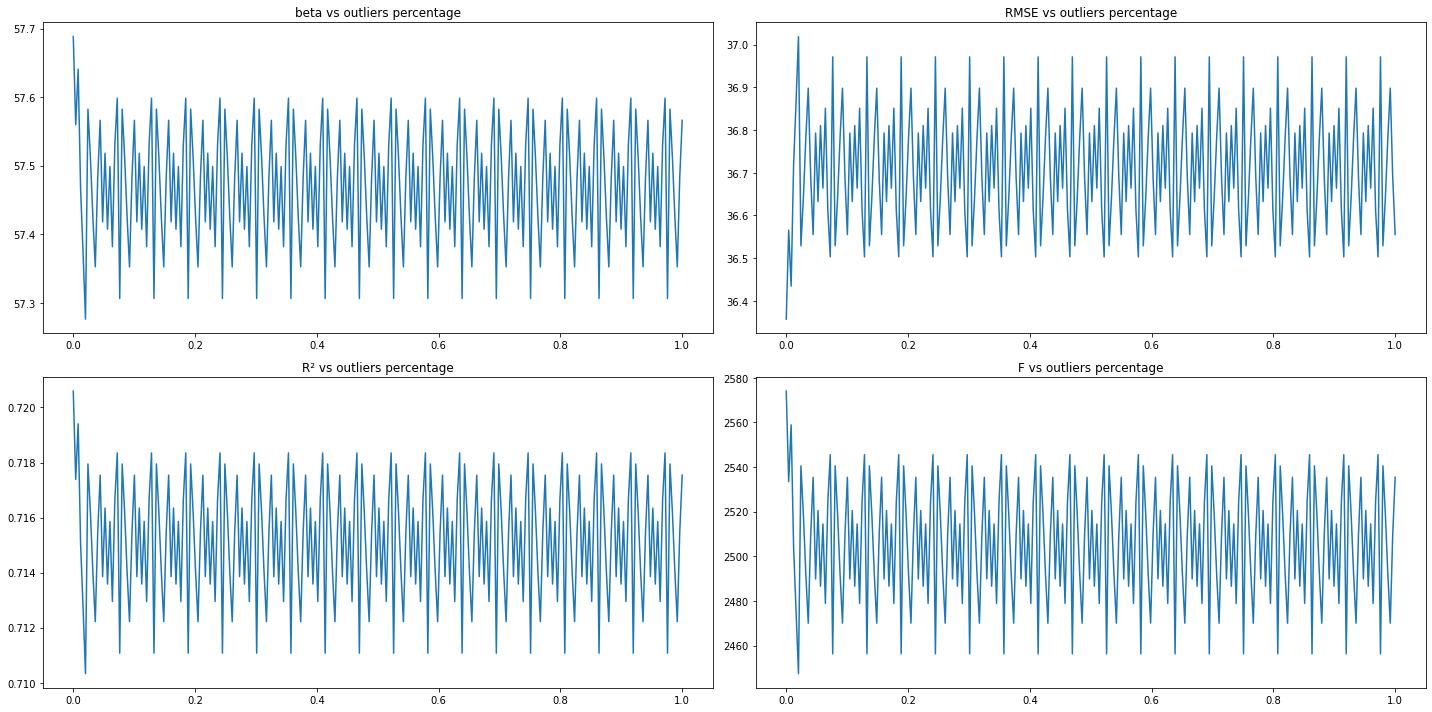

In [20]:
outliers_regressors(0)

Resultados para el *noise* inicial de 20

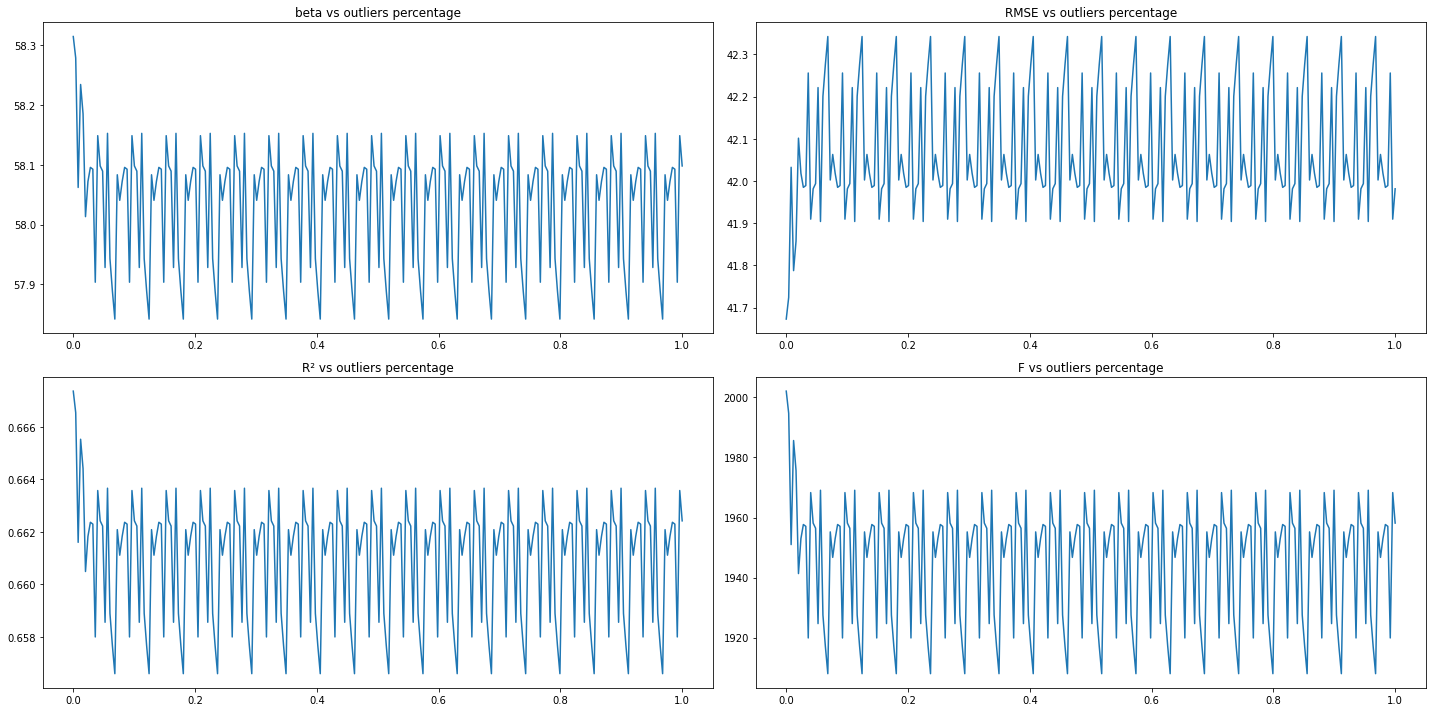

In [21]:
outliers_regressors(20)

Resultados para un *noise* mayor

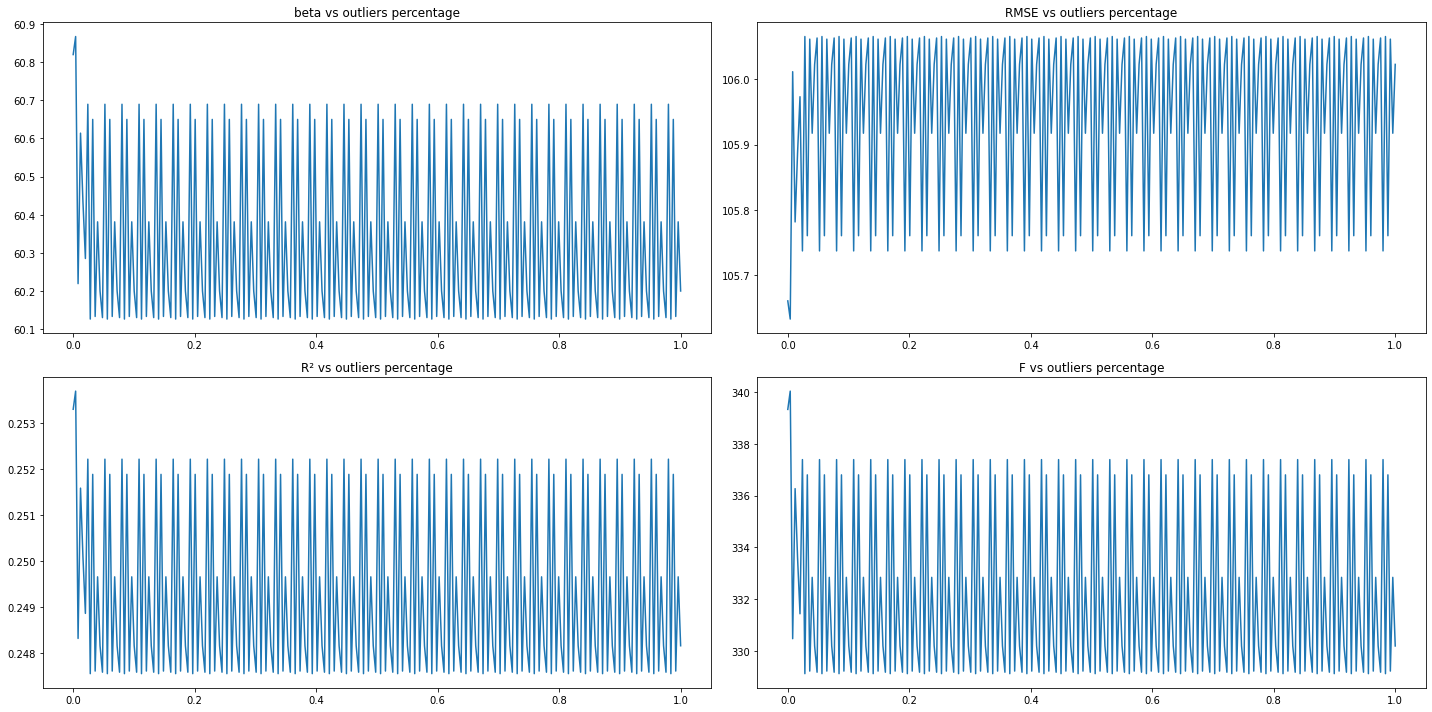

In [22]:
outliers_regressors(100)

Los resultados muestran que cuando no hay *outliers* en los datos ($p=0\%$), el parámetro $\beta$ y los coeficientes $R^2$ y F son máximos, mientras que los errores son mínimos. No obstante, cuando el porcentaje de *outliers* crece por debajo del $10\%$,  los parámetros $\beta$ y las métricas de la regresión lineal sufren variaciones relativamente altas, lo que depende de qué tan lejos se encuentran los *outliers* de los datos y por ende de sus residuos. Cuanto más lejos estén los *outliers* de los datos, mayores serán los errores y menores serán $R^2$ y F, y viceversa.

Sin embargo, las tendencias muestran que cuando el porcentaje de *outliers* aumenta por encima del $10\%$, los errores aumentan mientras que $R^2$ y $F$ disminuyen, estabilizándose en valores constantes, lo que se refleja en una disminución del parámetro $\beta$. Luego, al aumentar el número de *outliers* se reduce la capacidad explicativa del modelo.

Además, se observa que al aumentar el *noise* de los datos, el parámetro $\beta$ aumenta así como los errores asociados a la regresión. Al mismo tiempo, $R^2$ y F disminuyen, inidcando una pérdida en el poder explicativo de los modelos.
____________

## Tercera Parte (No supervisado)

### Sexto y Septimo Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 6) y $k=10$ (ej 7). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

# Estandarizar los datos (media = 0, desviación estándar = 1)
from sklearn.preprocessing import StandardScaler

# Aplicar el método PCA
from sklearn.decomposition import PCA

# Aplicar Kmeans
from sklearn.cluster import KMeans

# Para cargar el dataset MNIST
from sklearn.datasets import load_digits

# MINST
El conjunto de datos MINST es guardado como 'data' y corresponde a imágenes de dígitos escritos a mano que están en un espacio de 64 dimensiones (una dimensión por cada píxel de la imagen 8x8).

A continuación se emplea el método PCA para reducir estas dimensiones a sólo dos, lo que permitirá visualizar los dígitos en un gráfico 2D.

Se inicia así con la validación de la información de los datos:

In [24]:
# Se cargan los datos
data = load_digits()
# Número de componentes o dimensiones a las que se quiere reducir
nc = 2

# Se verifica si los datos poseen valores nulos
nan_values = np.isnan(data.data).sum()
print(f"Número de valores tipo NaN: {nan_values}")

Número de valores tipo NaN: 0


In [25]:
# Se verifica la cantidad única de clases (en este caso debe ser el conjunto de dígitos)
clases = np.unique(data.target)
print(f"Clases únicas en el dataset: {clases}")
print(f"Número total de clases: {clases.size}")

Clases únicas en el dataset: [0 1 2 3 4 5 6 7 8 9]
Número total de clases: 10


Se inicia el método PCA:

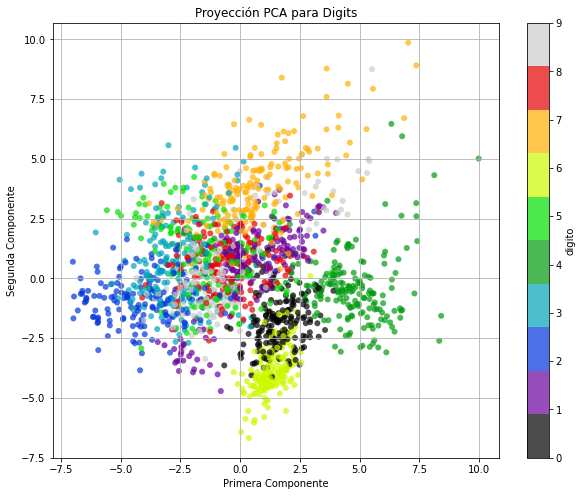

In [26]:
# Se estandarizan los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.data)

# Se inicia el método PCA, luego los datos se ajustan y se transforman
pca = PCA(n_components=nc).fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Se grafican las dos primeras componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data.target, edgecolor='none', alpha=0.7, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digito')
plt.title('Proyección PCA para Digits')
plt.xlabel('Primera Componente')
plt.ylabel('Segunda Componente')
plt.grid(True)
plt.show()

El gráfico anterior muestra cómo el método PCA logra agrupar en un espacio 2D las imágenes de los dígitos. Aquí cada agrupación de dígitos se representa con un color diferente. No obstante, al no haber líneas de decisión claras, no se pueden establecer clasificadores en este caso pues las imágenes se encuentran muy mezcladas.

Para saber cuántas componentes necesitamos para explicar el 80% de la varianza, se puede usar el siguiente cálculo:

In [27]:
# Se aplica PCA sin reducir la dimensionalidad como antes
pca = PCA()

# Se ajustan los datos
pca.fit(data.data)

# Se calcula la varianza explicada acumulada
var_acum = np.cumsum(pca.explained_variance_ratio_)

# Se encuentra el número de componentes para el 80% de varianza explicada
# Se suma 1 al final porque la indexación en python comienza en 0
componentes = np.where(var_acum >= 0.8)[0][0] + 1

print("Número de componentes necesarios para explicar el 80% de la varianza:", componentes)

Número de componentes necesarios para explicar el 80% de la varianza: 13


Esto significa que es posible reducir la dimensionalidad de las imágenes de los dígitos de 64 dimensiones a 13 dimensiones, manteniendo aún el 80% de la información de los datos originales, ya que estas 13 dimensiones contienen la mayor cantidad de varianza de los datos.

Lo anterior se puede observar en el siguiente gráfico de la variación acumulada en función del número de componentes, donde las líneas a trazos muestran que con 13 dimensiones se alcanza efectivamente el 80% de la varianza de los datos:

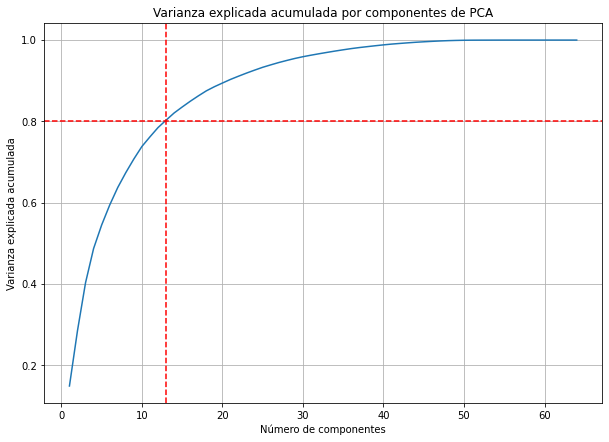

In [28]:
# Se grafica la varianza explicada acumulada en función del número de componentes
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(var_acum)+1), var_acum)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componentes de PCA')
plt.axvline(13, c='r', linestyle='--')
plt.axhline(0.8, c='r', linestyle='--')
plt.grid(True)
plt.show()

Finalmente, aplicando el algoritmo KMeans a los datos del conjunto de dígitos reducidos a dos dimensiones mediante PCA (data_pca) y estableciendo el número de clústeres en 2 y 10, se obtienen los siguientes gráficos de agrupación:

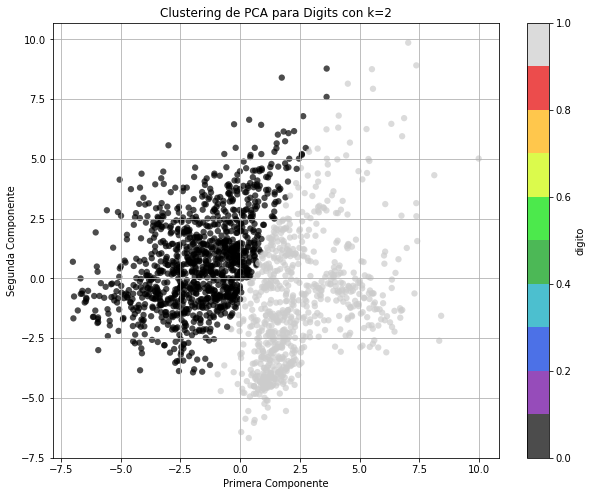

,cluster 0,cluster 1,Todos
0,1,177,178
1,105,77,182
2,170,7,177
3,179,4,183
4,4,177,181
5,163,19,182
6,0,181,181
7,145,34,179
8,142,32,174
9,153,27,180


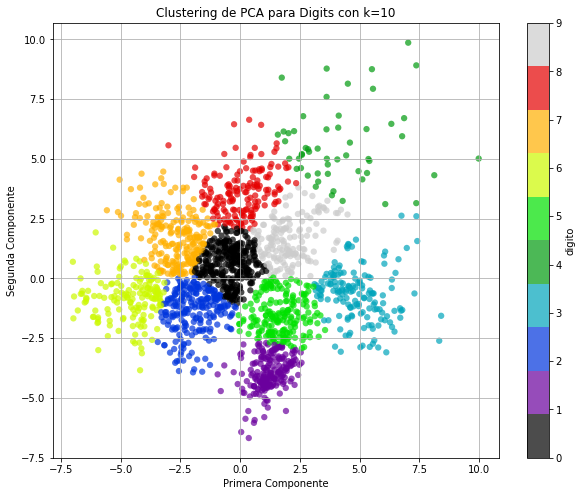

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,3,40,2,5,0,126,0,0,0,2,178
1,72,2,27,0,0,7,0,0,4,70,182
2,11,0,35,0,0,1,107,16,1,6,177
3,7,0,42,0,0,4,39,76,15,0,183
4,1,0,0,147,6,13,0,2,0,12,181
5,57,0,27,1,0,10,2,64,11,10,182
6,0,160,0,0,0,20,0,0,0,1,181
7,11,0,0,0,35,0,0,12,107,14,179
8,77,0,29,0,0,9,2,27,8,22,174
9,53,0,65,0,12,3,7,18,11,11,180


In [29]:
for nclusters in [2,10]:
    # Se inicia KMeans con el número de clusteres indicado
    kmeans = KMeans(n_clusters=nclusters, n_init=100)
    # Se ajustan y predecen los clústeres
    kmeans.fit_predict(data_pca)
    cluster_labels = kmeans.labels_

    # Se grafican las primeras dos componentes con los colores correspondientes a los clústeres predichos por KMeans
    plt.figure(figsize=(10, 8))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar(label='digito')
    plt.title(f'Clustering de PCA para Digits con k={nclusters}')
    plt.xlabel('Primera Componente')
    plt.ylabel('Segunda Componente')
    plt.grid(True)
    plt.show()

    # Se construyen las crosstab
    tab = pd.crosstab(data.target, cluster_labels, margins=True)
    tab.index = [str(i) for i in range(10)]+['Todos']
    tab.columns = ['cluster ' + str(i) for i in range(nclusters)] + ['Todos']
    display(tab)

Debido a la naturaleza de los datos, se esperaría que una agrupación de las imágenes de los dígitos en 10 conjuntos ($k=10$) sea la más conveniente. Sin embargo, el *crosstab* para este caso muestra que la clasificación no es buena pues lo que se espera es una matriz diagonal donde el número de dígitos $i$ esté contenido en el *cluster* $i$, lo cual no se observa aquí.

En el caso de $k=2$, la agrupación representa el conjunto de dígitos de 0 a 4 (*cluster* 0) y de 5 a 9 (*cluster* 1). Por lo tanto se espera que, en el *cluster* 0 las cantidades de dígitos entre 0 y 4 sean altas, mientras que en el *cluster* 1 se espera que las cantidades de dígitos entre 5 y 9 sean altas. Se observa entonces una clasificación relativamente buena para los dígitos 1, 2, 3 y 6 para este caso.

Aunque PCA permite reducir la dimensionalidad de los datos y aguparlos en categorias (colores para cada dígito), el primer gráfico de proyección usando solamente PCA muestra grupos sobrepuestos, dificilmente diferenciables. Con la aplicación de KMeans es posible establecer límites de decisión con agrupaciones más claras pero las *crosstab* muestran que las clasificaciones no son confiables, por lo que se necesita implementar un modelo de clasificación como se lizó en clase para el dataset HAR.

## Ejercicio 8

TBD

## Cuarta Parte

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`

*No logré terminar la segunda parte por falta de tiempo. Semana complicada en la empresa donde trabajo* :(